<a href="https://colab.research.google.com/github/Hariharan-Vengadasubramanian/ML-Assignment/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment Dataset : **diamonds**


#Objective : 
To predict Diamond Price based on available diamond features in dataset.   
# Approach :
1. Understand the data
2. Apply data preprocessing techniques
3. Select predictor variables for target variable Price.
4. Apply Regression model - Linear , Tree based, Ensemble techniques and compare results.
5. Conclusion  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Upload Dataset 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


# read it into dataframe

In [ ]:
data = pd.read_csv("diamonds.csv")

#Describe Data

In [ ]:
# Dimension of data  ;  Rows- 53,940 and  columns - 11
# No Duplicate present. It can be seen from shape before and after
print('Shape before deleting duplicate values:', data.shape)
data = data.drop_duplicates()
print('Shape after deleting duplicate values:', data.shape)


Shape before deleting duplicate values: (53940, 11)
Shape after deleting duplicate values: (53940, 11)


In [ ]:
#display top 5 rows of data
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Detailed Summary of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


#Data Summary 
1. Diamond data has 53,940 rows and 11 columns

2. Memory Consumption 4.5+ MB

3. There is no missing values in any column

4. There is no duplicate row

5. Data has 3 categorical variable; 8 Continuous variable

In [ ]:
#Describe 
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# To get count of Distinct values in each features
data.nunique() 

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [ ]:
## Serial Number is not needed , so it can be dropped
#data.columns
data = data.drop(['Unnamed: 0'],axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploratory Data Analysis

In [ ]:
### Rename Column names to best suit our purpose
data.rename(columns={"x": "length", "y": "width", "depth" : "depth %", "z" : "depth","table": "table %"},inplace = True)
data.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [ ]:
# Print Distinct list of Categorical variables
print(data['cut'].unique().tolist())
print(data['clarity'].unique().tolist())
print(data['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


# Understand Distribution of Data 


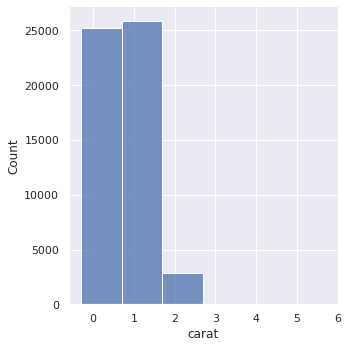

In [ ]:
# Let's Understand about Carat
# displot for Carat

sns.set(style="darkgrid")
sns.displot(data=data,x='carat',discrete=True) 
plt.show()


Box Plot of CARAT

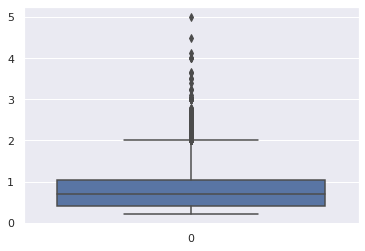

In [ ]:
### Box Plot 
#data.columns
sns.boxplot(data=data['carat'])
plt.show()
### Comment - Carat has Outliers. 


CARAT has Outliers. This is evident from BoxPlot. 
Identify Outlier using IQR.
Handle Outlier using Median Imputation Technique

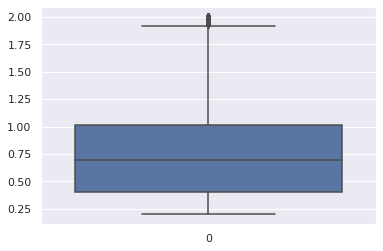

In [ ]:
q1 = data['carat'].quantile(0.25)
q3 = data['carat'].quantile(0.75)
iqr = q3 - q1
for i in data['carat']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    data['carat'] = data['carat'].replace(i,np.median(data['carat']))
sns.boxplot(data=data['carat'])
plt.show()

Distribution and Outlier Treatment for depth % feature: 

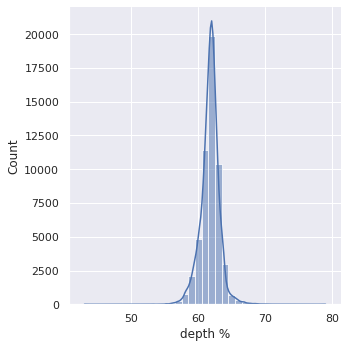

In [ ]:
# displot for depth%

sns.set(style="darkgrid")
sns.displot(data=data,x='depth %',kde=True,discrete=True) 
plt.show()

# Comment - Data distribution looks Normal

Box Plot for depth %

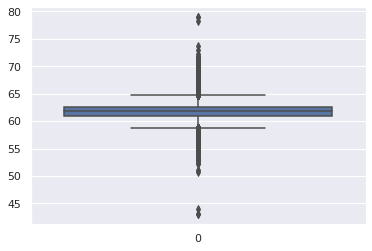

In [ ]:
### Box Plot 
#data.columns
sns.boxplot(data=data['depth %'])
plt.show()


Box Plot shows Outlier. Outlier impacts regression model. Identify Outlier using IQR. Outlier treatment using Median Imputation technique

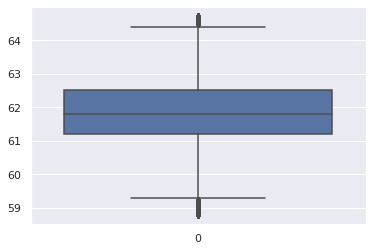

In [ ]:
q1 = data['depth %'].quantile(0.25)
q3 = data['depth %'].quantile(0.75)
iqr = q3 - q1
for i in data['depth %']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    data['depth %'] = data['depth %'].replace(i,np.median(data['depth %']))

sns.boxplot(data=data['depth %'])
plt.show()


Distribution and Outlier Treatment for table % feature: 

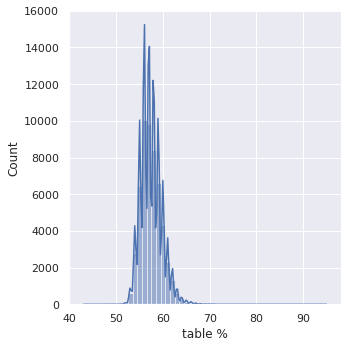

In [ ]:
# displot for table

sns.set(style="darkgrid")
sns.displot(data=data,x='table %',kde=True, discrete=True) 
plt.show()

# Comment - Data distribution looks Normal

Box Plot for table %

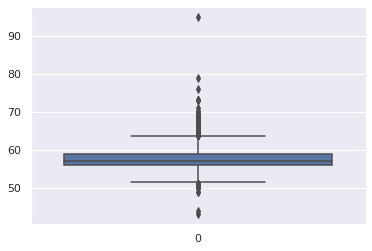

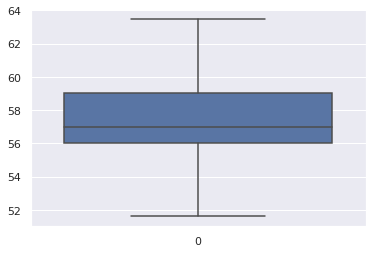

In [ ]:
### Box Plot 
#data.columns
sns.boxplot(data=data['table %'])
plt.show()


### Comment - there is no change in outlier with z-score (or) boxcox method. Use Median imputation technique for Outliers
q1 = data['table %'].quantile(0.25)
q3 = data['table %'].quantile(0.75)
iqr = q3 - q1
for i in data['table %']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    data['table %'] = data['table %'].replace(i,np.median(data['table %']))
sns.boxplot(data=data['table %'])
plt.show()


Distribution for Price

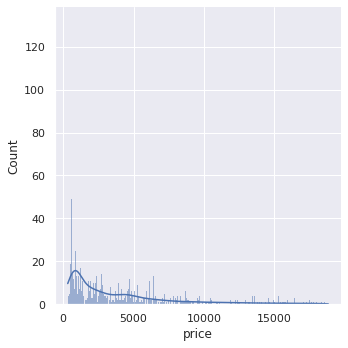

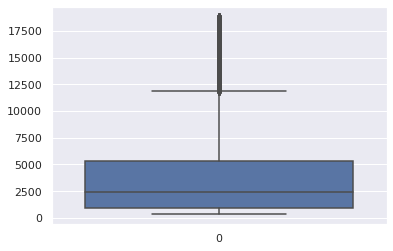

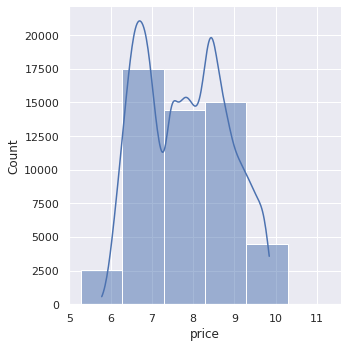

In [ ]:
# displot for price

sns.set(style="darkgrid")
sns.displot(data=data,x='price',kde=True, discrete=True) 
plt.show()

#data.columns
sns.boxplot(data=data['price'])
plt.show()

data["price"] = np.log(data["price"])
sns.displot(data=data,x='price',kde=True, discrete=True)
plt.show()
# Comment - Data has very high range value. Apply log transformation
#           Log transformation has made Price - distribution closer to normal


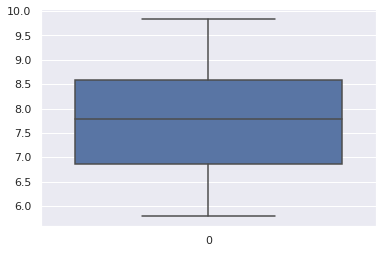

In [ ]:
sns.boxplot(data=data['price'])
plt.show()

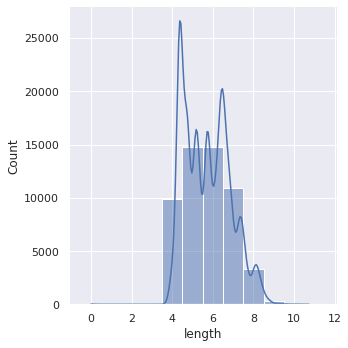

In [ ]:
# displot for  length

sns.set(style="darkgrid")
sns.displot(data=data,x='length',kde=True, discrete=True) 
plt.show()

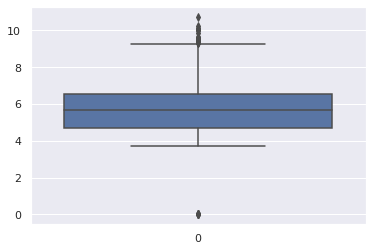

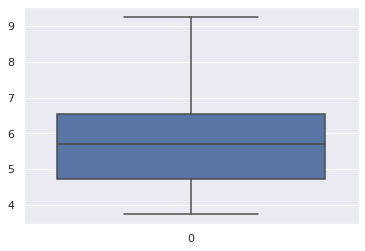

In [ ]:
### Box Plot for length
data.columns
sns.boxplot(data=data['length'])
plt.show()

### Comment - there is no change in outlier with z-score (or) boxcox method. Use Median imputation technique for Outliers
q1 = data['length'].quantile(0.25)
q3 = data['length'].quantile(0.75)
iqr = q3 - q1
for i in data['length']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    data['length'] = data['length'].replace(i,np.median(data['length']))
sns.boxplot(data=data['length'])
plt.show()

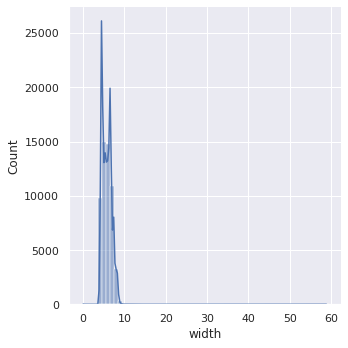

In [ ]:
# displot for  width

sns.set(style="darkgrid")
sns.displot(data=data,x='width',kde=True, discrete=True) 
plt.show()

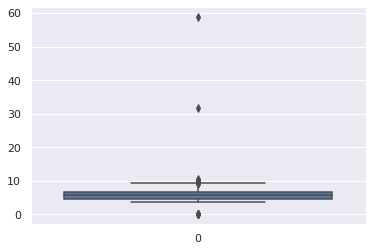

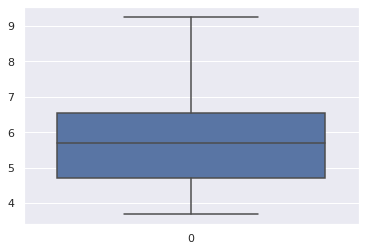

In [ ]:
### Box Plot 
#data.columns
sns.boxplot(data=data['width'])
plt.show()

### Comment - there is no change in outlier with z-score (or) boxcox method. Use Median imputation technique for Outliers
q1 = data['width'].quantile(0.25)
q3 = data['width'].quantile(0.75)
iqr = q3 - q1
for i in data['width']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    data['width'] = data['width'].replace(i,np.median(data['width']))
sns.boxplot(data=data['width'])
plt.show()

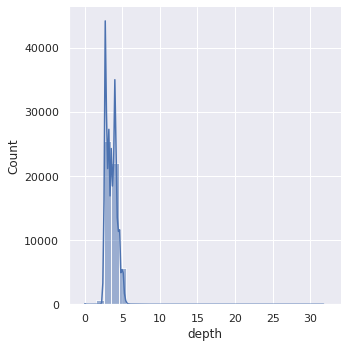

In [ ]:
# displot for  depth

sns.set(style="darkgrid")
sns.displot(data=data,x='depth',kde=True, discrete=True) 
plt.show()

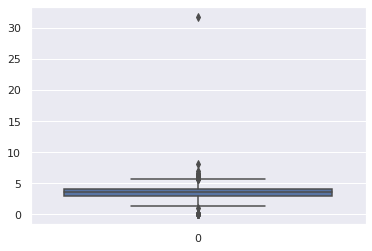

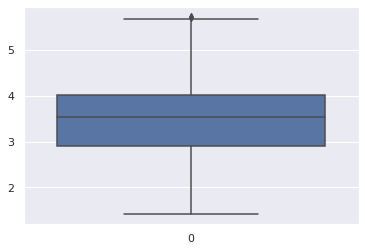

In [ ]:
### Box Plot for depth 
sns.boxplot(data=data['depth'])
plt.show()


### Comment - there is no change in outlier with z-score (or) boxcox method. Use Median imputation technique for Outliers
q1 = data['depth'].quantile(0.25)
q3 = data['depth'].quantile(0.75)
iqr = q3 - q1
for i in data['depth']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    data['depth'] = data['depth'].replace(i,np.median(data['depth']))
sns.boxplot(data=data['depth'])
plt.show()

Visual Exploration of Relation between variables

Categorical Variables vs Price

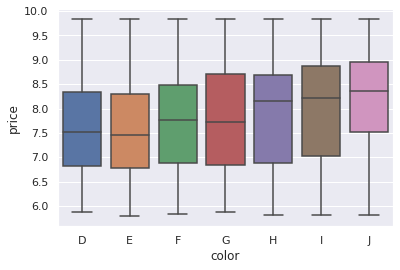

In [ ]:
# Do Color Vs Price
sns.boxplot(y='price',x='color',data=data,order=['D','E','F','G','H','I','J'])

Diamond color "J" highly priced. Followed by I.

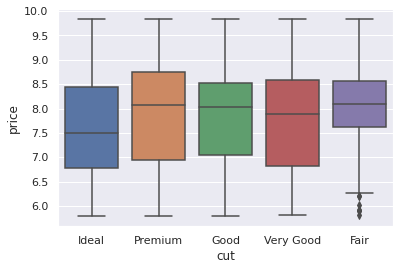

In [ ]:
# Do Cut Vs Price
sns.boxplot(y='price',x='cut',data=data,order=None)

Premium cut got higher price range. Followed by cut - Very Good. 

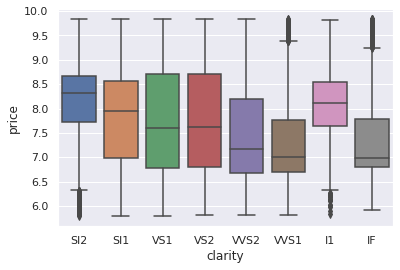

In [ ]:
# Do Clarity Vs Price
sns.boxplot(y='price',x='clarity',data=data,order=None)

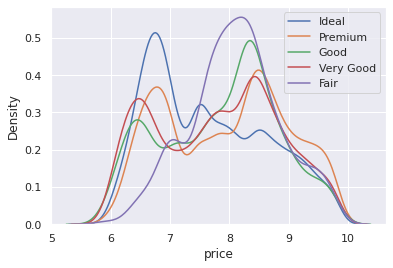

In [ ]:
## Kernel Density plot for cut vs price
sns.kdeplot(data.price[ data.cut=="Ideal"])
sns.kdeplot(data.price[ data.cut=="Premium"])
sns.kdeplot(data.price[ data.cut=="Good"])
sns.kdeplot(data.price[ data.cut=="Very Good"])
sns.kdeplot(data.price[ data.cut=="Fair"])
plt.legend(["Ideal", "Premium","Good","Very Good","Fair"])
plt.xlabel("price")
plt.show()

Lower Price range - dominated by Ideal cut; Middle Price range - dominated by Fair cut; High Price range - dominated by Premium cut

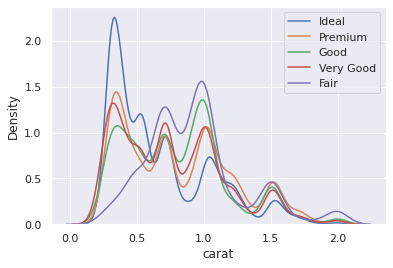

In [ ]:
## Kernel Density plot for cut vs carat
sns.kdeplot(data.carat[ data.cut=="Ideal"])
sns.kdeplot(data.carat[ data.cut=="Premium"])
sns.kdeplot(data.carat[ data.cut=="Good"])
sns.kdeplot(data.carat[ data.cut=="Very Good"])
sns.kdeplot(data.carat[ data.cut=="Fair"])
plt.legend(["Ideal", "Premium","Good","Very Good","Fair"])
plt.xlabel("carat")
plt.show()

Less Carat value got more of Ideal Cut diamonds

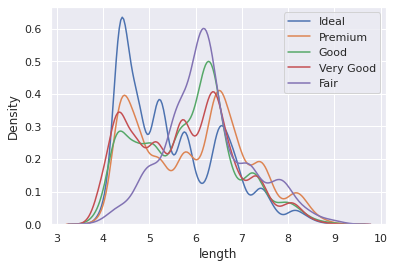

In [ ]:
## Kernel Density plot for cut vs length
sns.kdeplot(data.length[ data.cut=="Ideal"])
sns.kdeplot(data.length[ data.cut=="Premium"])
sns.kdeplot(data.length[ data.cut=="Good"])
sns.kdeplot(data.length[ data.cut=="Very Good"])
sns.kdeplot(data.length[ data.cut=="Fair"])
plt.legend(["Ideal", "Premium","Good","Very Good","Fair"])
plt.xlabel("length")
plt.show()

Length below 5 are more of Ideal Cut Diamond.
Length between 5.5 to 6.5 highly dominated by Fair cut.

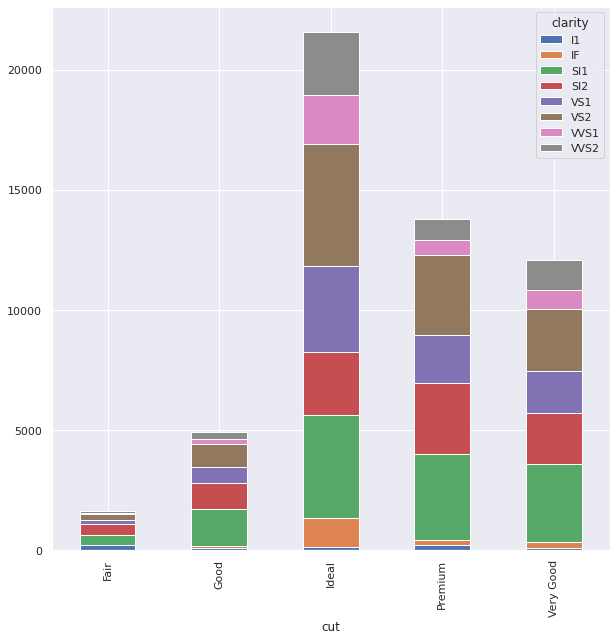

In [ ]:
# Do Crosstab
cut_clarity_table = pd.crosstab(index=data["cut"], columns=data["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

Above plot shows count against Diamond cut along with clarity in each. 
Ideal is more in count followed by Premium.
Clarity SI1, VS2 more pronounced in all cuts.

Continuous Variables VS Price

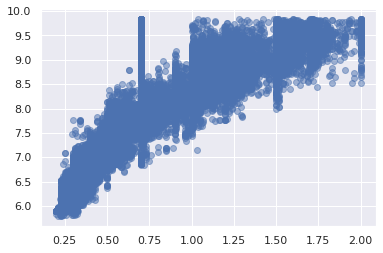

In [ ]:
# Scatter Plot - carat vs price
x=data.carat
y=data.price
plt.scatter(x,y,alpha=0.5)

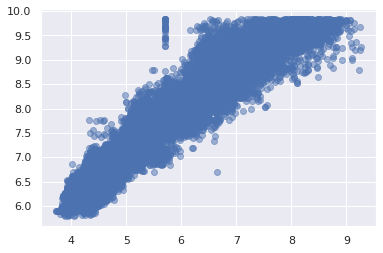

In [ ]:
# Scatter Plot - length vs price
x=data.length
y=data.price
plt.scatter(x,y,alpha=0.5)

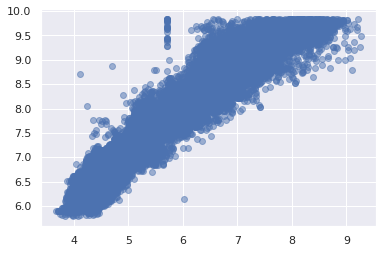

In [ ]:
# Scatter Plot - width vs price
x=data.width
y=data.price
plt.scatter(x,y,alpha=0.5)

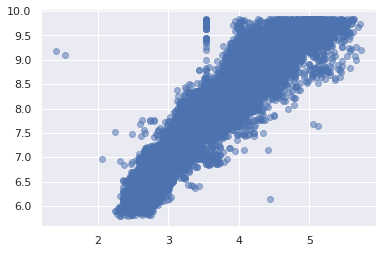

In [ ]:
# Scatter Plot - depth vs price
x=data.depth
y=data.price
plt.scatter(x,y,alpha=0.5)

Text(0, 0.5, 'Count')

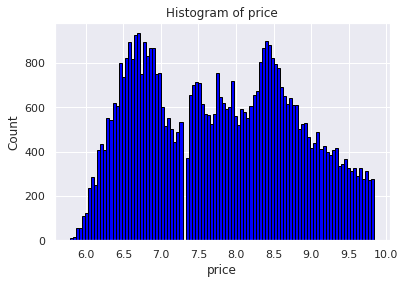

In [ ]:
# Histogram
plt.hist(data['price'],color='blue',edgecolor='black',bins=100)
# Add labels
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Count')

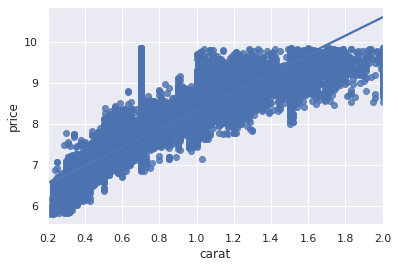

In [ ]:
sns.regplot(x=data["carat"], y=data["price"])

All these Scatter plots shows that Carat, Length, Width, depth are correlated with price.

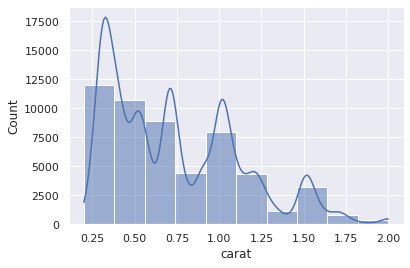

In [ ]:
# Histogram for Carat
sns.set(style="darkgrid")
sns.histplot(data=data, x="carat", kde=True,bins=10)
plt.show()

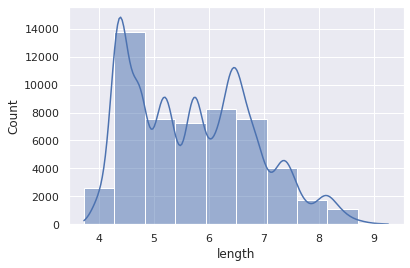

In [ ]:
# Histogram for Length

sns.set(style="darkgrid")
sns.histplot(data=data, x="length", kde=True,bins=10)
plt.show()

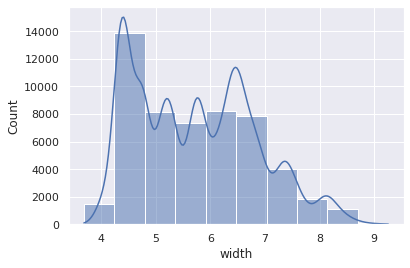

In [ ]:
# Histogram for Width

sns.set(style="darkgrid")
sns.histplot(data=data, x="width", kde=True,bins=10)
plt.show()

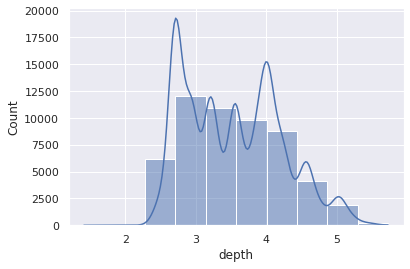

In [ ]:
# Histogram for depth

sns.set(style="darkgrid")
sns.histplot(data=data, x="depth", kde=True,bins=10)
plt.show()

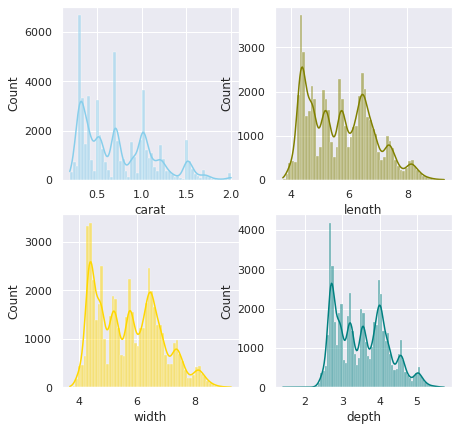

In [ ]:
### Plotting Distribution of Carat, length, Width, depth 
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=data, x="carat", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="length", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="width", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="depth", kde=True, color="teal", ax=axs[1, 1])


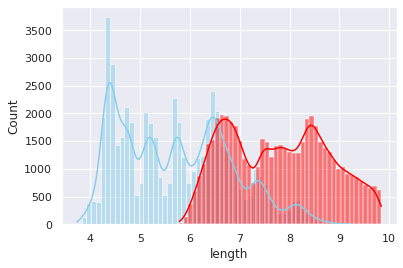

In [ ]:
# Plot Histogram of length and price

sns.set(style="darkgrid")
sns.histplot(data=data, x="length", color="skyblue", label="length", kde=True)
sns.histplot(data=data, x="price", color="red", label="price", kde=True)

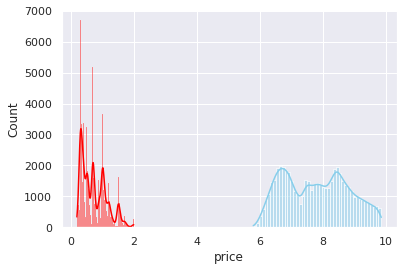

In [ ]:
# Plot Histogram of carat and price

sns.set(style="darkgrid")
sns.histplot(data=data, x="price", color="skyblue", label="price", kde=True)
sns.histplot(data=data, x="carat", color="red", label="carat", kde=True)

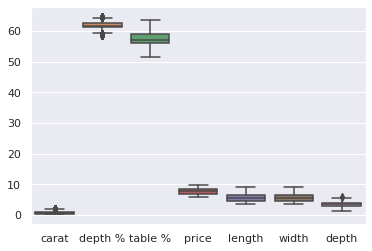

In [ ]:
### Box Plot 
#data.columns
sns.boxplot(data=data.loc[:, ['carat', 'depth %', 'table %', 'price','length', 'width', 'depth'] ])
plt.show()

# From above Box-plot, depth % and table % values are quite high. Based on Feature selection we can determine if these features are needed or not.

#FEATURE SELECTION TECHNIQUES

1. Pearson Correlation Coefficient test (For Continuous Variables)
Each predictor variable compared with target variable price and correlation value above 0.5 will be selected as significant features.

In [ ]:
Continuousdata=['price','carat','length','width','depth','table %', 'depth %']
# Create Correlation matrix
Correlationdata = data[Continuousdata].corr()
Correlationdata

,price,carat,length,width,depth,table %,depth %
price,1.000000,0.874475,0.960366,0.961198,0.956493,0.161284,0.001286
carat,0.874475,1.000000,0.879099,0.878437,0.879081,0.171727,0.026161
length,0.960366,0.879099,1.000000,0.998232,0.988952,0.194507,-0.019342
width,0.961198,0.878437,0.998232,1.000000,0.989057,0.190046,-0.021022
depth,0.956493,0.879081,0.988952,0.989057,1.000000,0.160078,0.071482
table %,0.161284,0.171727,0.194507,0.190046,0.160078,1.000000,-0.228350
depth %,0.001286,0.026161,-0.019342,-0.021022,0.071482,-0.228350,1.000000


In [ ]:
Correlationdata['price'][abs(Correlationdata['price']) > 0.5 ]

price     1.000000
carat     0.874475
length    0.960366
width     0.961198
depth     0.956493
Name: price, dtype: float64

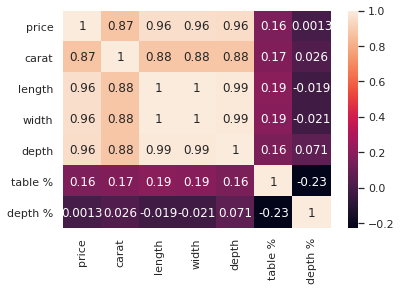

In [ ]:
sns.heatmap(data[Continuousdata].corr(),annot=True)

Carat, length, width, depth are highly correlated to Price. These features can be selected as Predictor variable.

Feature Selection Technique for Categorical Variable 
(ANOVA test)  
1. Null Hypothesis H0 - No relation between given variables.
Probability of H0 being true

In [ ]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=data, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 2.0834787552261962e-212
color is correlated with price | P-Value: 3.767555050498703e-301
clarity is correlated with price | P-Value: 0.0


['cut', 'color', 'clarity']

It looks cut, color and clarity are correlated with price. Thes 3 features can also be considered as Predictor variables

In [ ]:
# X- Features Selected after pearson correlation and ANOVA test

X_features = ['carat','length','width','depth','cut', 'color', 'clarity']

Do sample encoding and assign categorical variable with numerical values.

In [ ]:
data[['cut']]=data['cut'].replace(to_replace={'Premium':5,'Good':1,'Very Good':2,'Fair':3,'Ideal':4})

In [ ]:
data[['color']]=data['color'].replace(to_replace={'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7})

In [ ]:
data[['clarity']]=data['clarity'].replace(to_replace={'I1':1,'SI1':2,'SI2':3,'VS1':4,'VS2':5,'VVS1':6,'VVS2':7,'IF':8})

In [ ]:
# View Predictor variables data
data.head(20)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,4,6,3,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,1,6,4,61.8,57.0,5.789960,4.05,4.07,2.31
3,0.29,5,2,5,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,5.814131,4.34,4.35,2.75
5,0.24,2,1,7,62.8,57.0,5.817111,3.94,3.96,2.48
6,0.24,2,2,6,62.3,57.0,5.817111,3.95,3.98,2.47
7,0.26,2,3,2,61.9,55.0,5.820083,4.07,4.11,2.53
8,0.22,3,6,5,61.8,61.0,5.820083,3.87,3.78,2.49
9,0.23,2,3,4,59.4,61.0,5.823046,4.00,4.05,2.39


In [ ]:
encoded_data_df = pd.get_dummies(data[X_features])
encoded_data_df.head()

,carat,length,width,depth,cut,color,clarity
0,0.23,3.95,3.98,2.43,4,6,3
1,0.21,3.89,3.84,2.31,5,6,2
2,0.23,4.05,4.07,2.31,1,6,4
3,0.29,4.20,4.23,2.63,5,2,5
4,0.31,4.34,4.35,2.75,1,1,3


# Set Target and Predictor variables. Split train and test data.

In [ ]:
# Set Target Variable and Predictor Variable
Y = data.price
X = encoded_data_df

In [ ]:
# train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    train_size = 0.8,
                                                    random_state = 43)

#LINEAR MODELS

# MODEL 1 - Linear Regression

model bias: 1.8978393438334429
model coefficient: [0.2719145  0.12735889 0.42494537 0.50907363 0.01093608 0.07589304
 0.08497426]
R squared: 0.9608695154197382
RMSE: 0.9608695154197382
Test Model R squared: 0.9592004196625015
Test Model RMSE: 0.9592004196625015
Train Accuracy: 96.07%
Test Accuracy: 95.92%
Predictions:	 [6.30867817 7.75503746 6.60710469 8.44039177 7.20393703 6.92292733
 8.63532348]
Labels:		 [6.037870919922137, 7.843848638152472, 6.484635235635252, 8.189799618728228, 7.00850518208228, 6.9584483932976555, 8.776321456449958]
------------- Train --------------


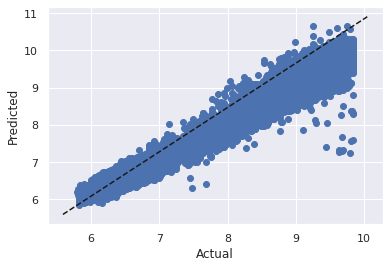

------------- Test ---------------


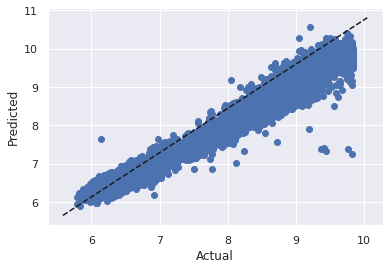

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train, y_train)

print('model bias:',linreg.intercept_) 

print('model coefficient:',linreg.coef_) 

# Predictions
y_pred = linreg.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(linreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()


# Test Performaces
linreg.fit(X_test,y_test)
y_test_pred = linreg.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(linreg.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(linreg.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", linreg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, linreg.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, linreg.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Model 2 - Ridge Regression


R squared: 0.9608694966204419
RMSE: 0.9608694966204419
Test Model R squared: 0.9592003614620306
Test Model RMSE: 0.9592003614620306
Train Accuracy: 96.07%
Test Accuracy: 95.92%
Predictions:	 [8.37341197 7.95559671 9.03364497 9.26001685 7.27365799 6.78600947
 6.41035753]
Labels:		 [8.593413217327646, 8.173011311724972, 8.806274284781725, 9.251386341412184, 7.271703706887368, 6.889591308354466, 6.263398262591624]
------------- Train --------------


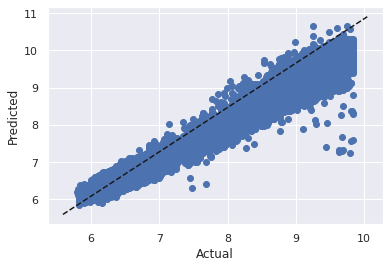

------------- Test ---------------


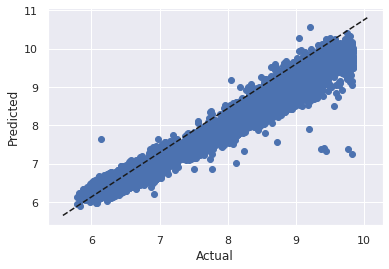

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
ridge = Ridge(alpha = 1, max_iter = 500)

# Train the model
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(ridge, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
ridge.fit(X_test,y_test)
y_test_pred = ridge.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(ridge.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(ridge.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", ridge.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, ridge.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, ridge.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Model 3 - LASSO regression

R squared: 0.957925804340223
RMSE: 0.957925804340223
Test Model R squared: 0.9563285717935595
Test Model RMSE: 0.9563285717935595
Train Accuracy: 95.72%
Test Accuracy: 95.63%
Predictions:	 [6.65892523 8.24843628 7.87764549 6.76286039 8.39338815 8.0392653
 7.24299214]
Labels:		 [6.39024066706535, 8.279189777195004, 7.744569809354496, 6.35088571671474, 8.846640813100485, 8.138856750696325, 7.425357887027151]
------------- Train --------------


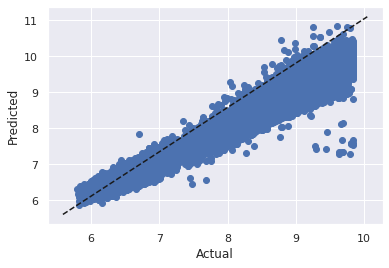

------------- Test ---------------


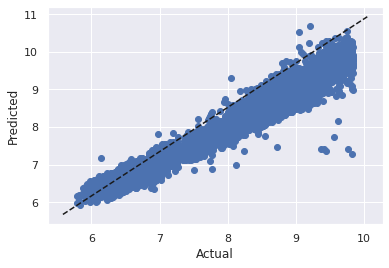

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
lasso = Lasso (alpha = 0.01, max_iter = 1000)

# Train the model
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(lasso, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
lasso.fit(X_test,y_test)
y_test_pred = lasso.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(lasso.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(lasso.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", lasso.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, lasso.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, lasso.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Model 4 - ElasticNet Regression

R squared: 0.882579129978965
RMSE: 0.882579129978965
Test Model R squared: 0.882239714729334
Test Model RMSE: 0.882239714729334
Train Accuracy: 88.37%
Test Accuracy: 88.22%
Predictions:	 [6.90844244 6.83844385 8.00631885 8.20184682 7.14158181 8.8734382
 7.6989173 ]
Labels:		 [6.46302945692067, 6.489204931325317, 8.067462667010057, 8.53346016388011, 6.717804695023691, 9.456184308811169, 7.437206366871292]
------------- Train --------------


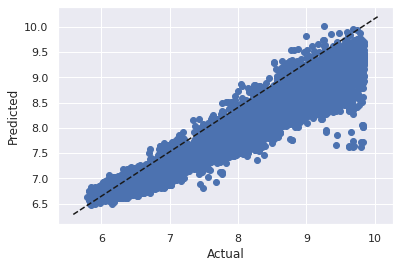

------------- Test ---------------


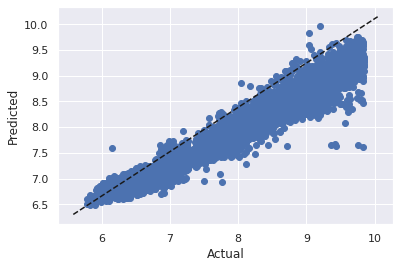

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
elasticnet = ElasticNet (alpha = 1.01, l1_ratio = 0.001, max_iter = 500)

# Train the model
elasticnet.fit(X_train, y_train)

# Predictions
y_pred = elasticnet.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(elasticnet, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
elasticnet.fit(X_test,y_test)
y_test_pred = elasticnet.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(elasticnet.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(elasticnet.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", elasticnet.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, elasticnet.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, elasticnet.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


#Model 5 - Stochastic Gradient Descent 

R squared: 0.8868332648870205
RMSE: 0.8868332648870205
Test Model R squared: 0.917150863943798
Test Model RMSE: 0.917150863943798
Train Accuracy: 91.92%
Test Accuracy: 91.72%
Predictions:	 [7.98695332 7.73229709 7.98320669 7.07716303 7.06738344 6.91214356
 9.71333365]
Labels:		 [7.970394907191429, 7.724004656676065, 8.158229916959494, 6.559615237493242, 6.4967749901858625, 6.385194398997726, 9.805047479722875]
------------- Train --------------


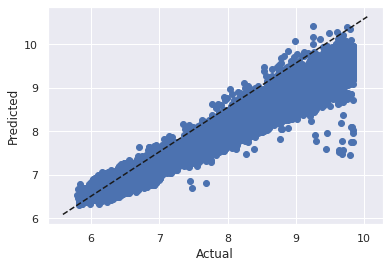

------------- Test ---------------


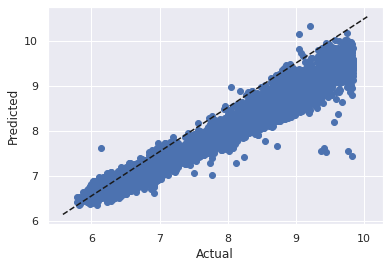

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
SGD = SGDRegressor (alpha = 1.01, l1_ratio = 0.001, max_iter = 500, random_state=43)

# Train the model
SGD.fit(X_train, y_train)

# Predictions
y_pred = SGD.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(SGD, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
SGD.fit(X_test,y_test)
y_test_pred = SGD.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(SGD.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(SGD.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", SGD.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, SGD.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, SGD.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Model 6 - Bayesian Ridge Regressor 

R squared: 0.9608695103173285
RMSE: 0.9608695103173285
Test Model R squared: 0.9592003944002443
Test Model RMSE: 0.9592003944002443
Train Accuracy: 96.07%
Test Accuracy: 95.92%
Predictions:	 [7.24381701 8.34290942 6.93376075 8.9894668  8.8887474  9.7504804
 7.74749894]
Labels:		 [7.122866658599083, 8.54188580400661, 6.966967138613983, 9.516942329280475, 8.677780256064185, 9.77996306625063, 7.80016307039296]
------------- Train --------------


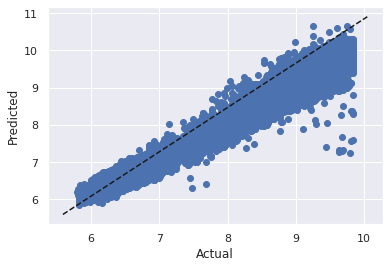

------------- Test ---------------


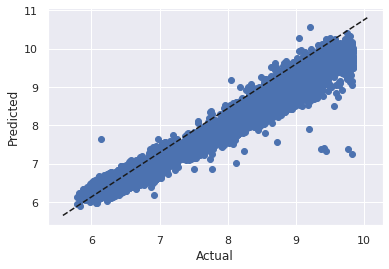

In [ ]:
# BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
Bayes = BayesianRidge()  

# Train the model
Bayes.fit(X_train, y_train)

# Predictions
y_pred = Bayes.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(Bayes, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
Bayes.fit(X_test,y_test)
y_test_pred = Bayes.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(Bayes.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(Bayes.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", Bayes.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, Bayes.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, Bayes.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Tree Based Model

# Model 7 - Decision tree Regressor

R squared: 0.999962955445266
RMSE: 0.999962955445266
Test Model R squared: 0.9999743854913636
Test Model RMSE: 0.9999743854913636
Train Accuracy: 98.14%
Test Accuracy: 100.0%
Predictions:	 [9.53010234 9.47753909 6.39024067 7.77653503 8.04654936 8.83346272
 7.18841274]
Labels:		 [9.530102337891375, 9.477539085486564, 6.39024066706535, 7.776535028185241, 8.046549357283078, 8.83346272071993, 7.188412736496954]
------------- Train --------------


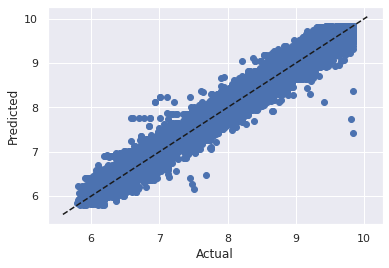

------------- Test ---------------


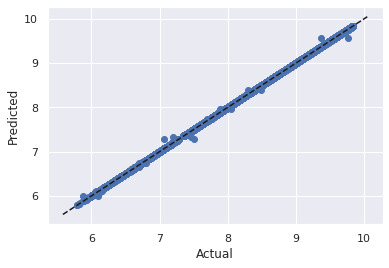

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
decisionreg = DecisionTreeRegressor (random_state = 43)

# Train the model
decisionreg.fit(X_train, y_train)

# Predictions
y_pred = decisionreg.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(decisionreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
decisionreg.fit(X_test,y_test)
y_test_pred = decisionreg.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(decisionreg.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(decisionreg.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", decisionreg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, decisionreg.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, decisionreg.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Ensemble Models 
MODEL 8 - Gradient Boosting

R squared: 0.964227785447815
RMSE: 0.964227785447815
Test Model R squared: 0.9637388383292318
Test Model RMSE: 0.9637388383292318
Train Accuracy: 96.41%
Test Accuracy: 96.37%
Predictions:	 [6.3883742  6.97052073 9.57035845 8.26620393 6.60926713 6.65972924
 9.16059151]
Labels:		 [6.3473892096560105, 7.097548850614793, 9.80978108609582, 8.441822884391462, 6.802394763324311, 6.530877627725885, 8.82776136765472]
------------- Train --------------


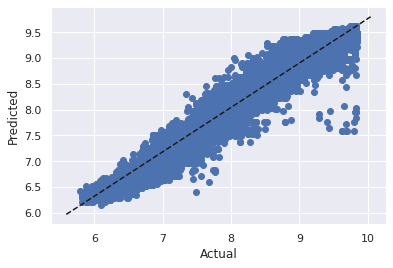

------------- Test ---------------


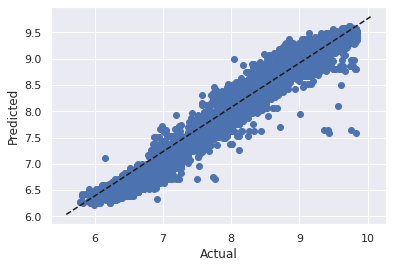

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
gradreg = GradientBoostingRegressor (n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 43, loss = 'ls')

# Train the model
gradreg.fit(X_train, y_train)

# Predictions
y_pred = gradreg.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(gradreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
gradreg.fit(X_test,y_test)
y_test_pred = gradreg.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(gradreg.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(gradreg.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", gradreg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, gradreg.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, gradreg.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Model 9 - AdaBoost Regression

R squared: 0.946759287003772
RMSE: 0.946759287003772
Test Model R squared: 0.9437560258980441
Test Model RMSE: 0.9437560258980441
Train Accuracy: 94.51%
Test Accuracy: 94.38%
Predictions:	 [6.44668738 9.12339462 9.19734867 6.7887581  7.0847564  8.61767025
 7.40794627]
Labels:		 [6.416732282512326, 9.404343433543975, 9.084323531392696, 6.915723448631314, 7.126890808898808, 8.592300663903043, 7.264730177929867]
------------- Train --------------


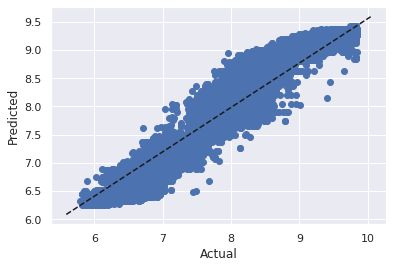

------------- Test ---------------


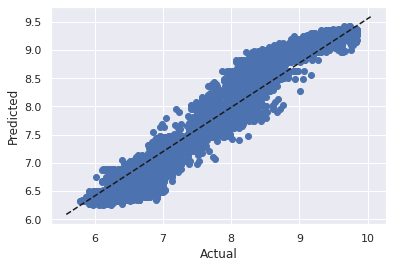

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
adareg = AdaBoostRegressor(n_estimators = 100)  

# Train the model
adareg.fit(X_train, y_train)

# Predictions
y_pred = adareg.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(adareg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
adareg.fit(X_test,y_test)
y_test_pred = adareg.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(adareg.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(adareg.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", adareg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, adareg.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, adareg.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()


# Model 10 Random Forest Regressor

R squared: 0.9987682102695918
RMSE: 0.9987682102695918
Test Model R squared: 0.9984172195398053
Test Model RMSE: 0.9984172195398053
Train Accuracy: 98.96%
Test Accuracy: 99.84%
Predictions:	 [7.38777624 8.57594129 8.45477696 7.82539877 8.43060723 7.7618237
 8.03767824]
Labels:		 [7.392647520721623, 8.564458383883352, 8.509967146324497, 7.8674885686991285, 8.371242135931933, 7.771910256435763, 8.0861025356691]
------------- Train --------------


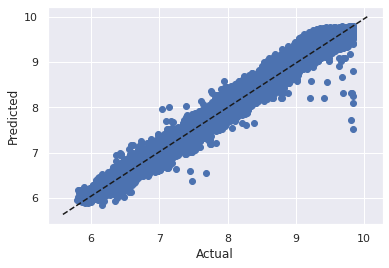

------------- Test ---------------


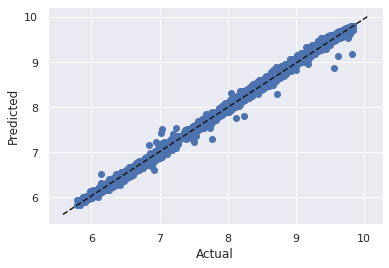

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from random import randint

# Create the model
randreg = RandomForestRegressor(n_estimators = 100,random_state=43)  

# Train the model
randreg.fit(X_train, y_train)

# Predictions
y_pred = randreg.predict(X_train)


# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", r2)

# Cross Validation
cv_score = cross_val_score(randreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cv_score)
cv_rmse_mean = cv_rmse.mean()

# Test Performaces
randreg.fit(X_test,y_test)
y_test_pred = randreg.predict(X_test)

# Models Performance
#1. R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
print("Test Model R squared:", r2)
#2. Root Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Model RMSE:", r2)

# Train and Test accuracy
train_accuracy = round(randreg.score(X_train, y_train) * 100, 2)
print("Train Accuracy:", str(train_accuracy)+"%")

test_accuracy = round(randreg.score(X_test, y_test) * 100, 2)
print("Test Accuracy:", str(test_accuracy)+"%")

# Check how well model works on Test set by comparing prices
start = randint(1, len(y_test))
some_data = X_test.iloc[start:start + 7]
some_labels = y_test.iloc[start:start + 7]
some_data_prepared = some_data
print("Predictions:\t", randreg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

# Visualize the fitted regression line
print("------------- Train --------------")
plt.scatter(y_train, randreg.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

print("------------- Test ---------------")
plt.scatter(y_test, randreg.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()



# CONCLUSION

Comparison result of all 10 models
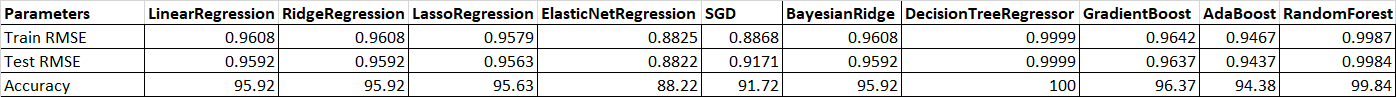

1. Features got outlier, outliers are identified using IQR method and handled using appropriate imputation technique.   
2. From descriptive analytics, its observed that 4 continuous features (carat, length, width, depth) and 3 categorical features (cut, clarity, color) impacts target variable diamond price.
3. Feature selection using Pearson Correlation coefficient and ANOVA test gives 7 significant features as Predictor variables. 
Predictor variables - Carat, length, width, depth, cut, clarity,color
4. Split train and test into 80-20 range.
5. Regression technique - Linear models, tree models and ensemble models used.  
6. Linear models got similar Accuracy % and RMSE value.
7. Ensemble based regression model GradientBoost regressor got higher accuracy.
8. Tree based models DecisionTreeRegressor and RandomForest got 100% accuracy, we can ignore these models. Not good to deploy a model with 100% accuracy.
9. We can pick any one of GradientBoost,  LinearRegression, Ridge, Lasso models to predict diamond prices. These models can be deployed in production environment for better result and to achieve our objective.
